## CSA-Africa22 - Machine Learning Project (Group II)   

## Car Evaluation Using KNN-Classification Algorithm

<div class="alert alert-block alert-success">
<b>Data Source:</b> UCI - MACHINE LEARNING REPOSITORY
</div>

<div class="alert alert-block alert-warning">
<b>Goal:</b> TO CLASSIFY CARS INTO THE CLASSES LISTED BASED ON THE AVAILABLE FEATURES.

    The model evaluates Cars according to some of its concept's structure listed below:
    - Buying Rate 
    - Maintainance cost 
    - Numbers of Doors 
    - Capacity (Persons)
    - Size of Boot
    - Safety
    
   

    These features are used to classify Cars into four classes: 
    - Unaccurate 
    - Accurate
    - Good 
    - Very good
    

# Importing the required libraries

In [1]:
# from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Visualizing the data-set

In [2]:
data_set = pd.read_csv('car.data')

#Visualizing my data-set
data_set.head(10)

,buying,maint,door,persons,log_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


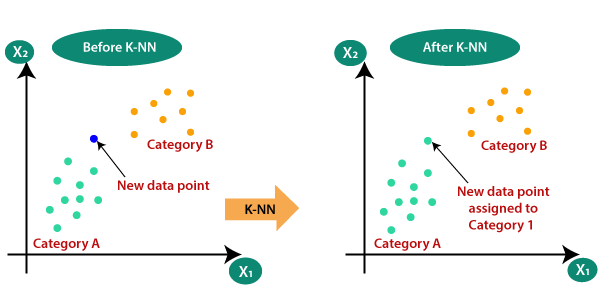

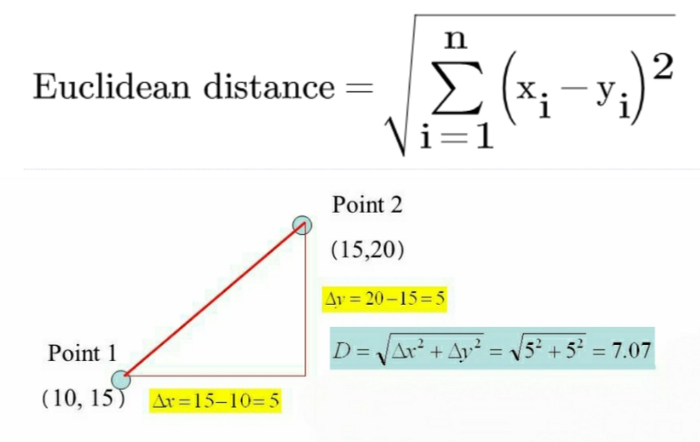

In [3]:
#Using encoder object to change strings to digits
encoder = preprocessing.LabelEncoder()

#Then applied this on each column of my data-set 
buying = encoder.fit_transform(list(data_set['buying']))
maint = encoder.fit_transform(list(data_set['maint']))
safety = encoder.fit_transform(list(data_set['safety']))
log_boot = encoder.fit_transform(list(data_set['log_boot']))
door = encoder.fit_transform(list(data_set['door']))
persons = encoder.fit_transform(list(data_set['persons']))
my_class = encoder.fit_transform(list(data_set['class']))


In [4]:
predict = 'class'

#set independent variables
X = list (zip(buying, maint, safety, log_boot, door, persons ))

#set dependent variables
y = list(my_class)

In [5]:
#split your data-set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [6]:
#visualizing set of independent data set for training our model
X_train

[(1, 1, 0, 2, 1, 0),
 (1, 0, 2, 0, 2, 0),
 (3, 1, 2, 2, 1, 1),
 (3, 2, 1, 2, 3, 2),
 (1, 3, 2, 1, 2, 2),
 (3, 0, 0, 0, 2, 0),
 (0, 1, 1, 0, 0, 0),
 (1, 1, 2, 2, 3, 2),
 (0, 1, 2, 2, 2, 1),
 (1, 0, 0, 2, 1, 0),
 (2, 1, 0, 2, 2, 0),
 (0, 1, 0, 0, 3, 2),
 (3, 3, 2, 1, 0, 2),
 (1, 0, 2, 0, 3, 1),
 (3, 3, 1, 2, 1, 2),
 (0, 0, 0, 2, 3, 1),
 (0, 2, 1, 1, 0, 0),
 (3, 3, 2, 0, 2, 0),
 (2, 1, 0, 2, 2, 2),
 (1, 0, 0, 0, 2, 2),
 (3, 2, 2, 1, 3, 2),
 (0, 1, 2, 0, 3, 1),
 (2, 0, 2, 1, 1, 0),
 (1, 0, 0, 1, 3, 2),
 (0, 3, 0, 2, 1, 0),
 (2, 0, 1, 1, 2, 1),
 (1, 2, 1, 1, 1, 0),
 (2, 1, 2, 2, 3, 1),
 (1, 0, 2, 2, 2, 0),
 (3, 3, 1, 2, 1, 0),
 (1, 2, 0, 0, 3, 0),
 (2, 1, 2, 1, 0, 2),
 (3, 2, 2, 2, 2, 2),
 (2, 3, 0, 2, 1, 2),
 (1, 1, 2, 1, 3, 2),
 (2, 0, 0, 0, 2, 0),
 (1, 2, 2, 0, 1, 1),
 (3, 0, 1, 1, 3, 2),
 (1, 0, 1, 2, 0, 1),
 (1, 2, 2, 1, 3, 0),
 (0, 1, 2, 0, 0, 2),
 (2, 2, 0, 0, 1, 0),
 (0, 3, 0, 2, 0, 0),
 (1, 0, 0, 1, 2, 0),
 (0, 1, 1, 1, 0, 0),
 (3, 1, 1, 2, 3, 1),
 (3, 3, 0, 2, 0, 0),
 (1, 2, 0, 1,

In [7]:
#visualizing set of independent data set for testing our model
X_test

[(1, 3, 2, 1, 0, 2),
 (3, 0, 2, 0, 0, 1),
 (0, 2, 1, 2, 0, 0),
 (3, 2, 1, 0, 1, 0),
 (1, 2, 1, 0, 3, 0),
 (1, 1, 0, 1, 0, 2),
 (0, 1, 1, 2, 1, 0),
 (1, 3, 0, 1, 2, 1),
 (2, 1, 2, 1, 1, 1),
 (2, 0, 2, 1, 0, 1),
 (3, 3, 1, 0, 0, 0),
 (3, 0, 0, 2, 2, 2),
 (1, 1, 2, 1, 0, 1),
 (1, 3, 1, 2, 2, 2),
 (2, 2, 1, 0, 1, 1),
 (2, 3, 2, 0, 1, 1),
 (3, 0, 2, 2, 0, 1),
 (3, 3, 2, 1, 2, 2),
 (3, 2, 2, 0, 1, 1),
 (1, 3, 2, 2, 0, 2),
 (2, 1, 0, 1, 0, 2),
 (2, 3, 0, 0, 3, 2),
 (1, 1, 2, 1, 0, 2),
 (2, 3, 1, 1, 2, 1),
 (0, 0, 1, 0, 0, 0),
 (3, 1, 2, 2, 2, 0),
 (3, 2, 1, 0, 0, 2),
 (3, 2, 0, 2, 3, 0),
 (0, 3, 0, 1, 1, 2),
 (0, 3, 2, 2, 2, 0),
 (2, 1, 0, 1, 1, 1),
 (0, 0, 0, 2, 1, 1),
 (1, 1, 1, 0, 0, 1),
 (0, 2, 0, 0, 1, 1),
 (1, 1, 2, 0, 2, 1),
 (0, 0, 1, 0, 0, 2),
 (3, 0, 2, 1, 2, 1),
 (1, 1, 1, 0, 2, 0),
 (3, 3, 2, 0, 1, 0),
 (3, 3, 0, 0, 2, 2),
 (1, 3, 2, 2, 3, 2),
 (2, 2, 2, 0, 0, 0),
 (1, 3, 2, 1, 0, 1),
 (1, 2, 1, 1, 2, 0),
 (2, 1, 0, 0, 2, 2),
 (1, 3, 2, 2, 3, 0),
 (1, 3, 2, 2, 1, 1),
 (2, 3, 2, 0,

# Creating the model using KNN algorithm 


In [8]:
k_model = KNeighborsClassifier(n_neighbors = 5)

k_model.fit(X_train, y_train)

KNeighborsClassifier()

# Checking for the accuracy of the prediction

In [9]:
#Checking for the accuracy of our prediction 

accuracy = k_model.score(X_test,y_test)

print(f'{accuracy: .2%}')

 91.04%


## Searching for perfect K-value

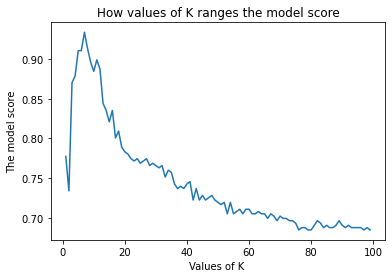

In [10]:
my_list = []

for i in range (1, 100):
    k_range = KNeighborsClassifier(n_neighbors = i)
    k_range.fit(X_train, y_train)
    
    my_list.append(k_range.score(X_test, y_test))
my_list = np.array(my_list)

plt.plot(np.arange(1, 100), my_list)
plt.xlabel("Values of K ")
plt.ylabel("The model score")
plt.title("How values of K ranges the model score")
plt.show()

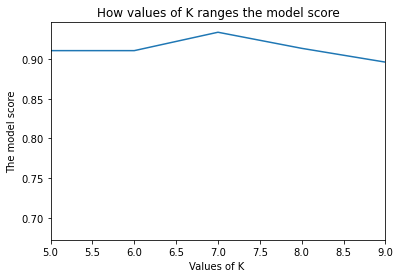

In [11]:
plt.plot(np.arange(1, 100), my_list)
plt.xlabel("Values of K ")
plt.xlim(5, 9)
plt.ylabel("The model score")
plt.title("How values of K ranges the model score")
plt.show()

## Using highest k-value to build
Highest k-value is 7. So let's build

In [12]:
#Creating the model using KNN algorithm 

knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [13]:
#Checking for the accuracy of our prediction 

accuracy = knn_model.score(X_test,y_test)

print(f'{accuracy: .2%}')

 93.35%


In [14]:
#Using the other split of our independent data-set (Test set) to make predictions from our model
y_pred = knn_model.predict(X_test)

# Comparing our model predictions with the expected data

In [15]:
#classification of our dependent variables into classes
names = ['unacc', 'acc', 'good', 'vgood']

for x in range(len(y_pred)):
    print('predicted: ', names[y_pred[x]], 'Data: ', X_test[x], 'Expected: ', names[y_test[x]])
    

predicted:  good Data:  (1, 3, 2, 1, 0, 2) Expected:  good
predicted:  good Data:  (3, 0, 2, 0, 0, 1) Expected:  good
predicted:  good Data:  (0, 2, 1, 2, 0, 0) Expected:  good
predicted:  good Data:  (3, 2, 1, 0, 1, 0) Expected:  good
predicted:  good Data:  (1, 2, 1, 0, 3, 0) Expected:  good
predicted:  unacc Data:  (1, 1, 0, 1, 0, 2) Expected:  acc
predicted:  good Data:  (0, 1, 1, 2, 1, 0) Expected:  good
predicted:  unacc Data:  (1, 3, 0, 1, 2, 1) Expected:  unacc
predicted:  good Data:  (2, 1, 2, 1, 1, 1) Expected:  unacc
predicted:  good Data:  (2, 0, 2, 1, 0, 1) Expected:  good
predicted:  good Data:  (3, 3, 1, 0, 0, 0) Expected:  good
predicted:  good Data:  (3, 0, 0, 2, 2, 2) Expected:  good
predicted:  unacc Data:  (1, 1, 2, 1, 0, 1) Expected:  unacc
predicted:  good Data:  (1, 3, 1, 2, 2, 2) Expected:  good
predicted:  good Data:  (2, 2, 1, 0, 1, 1) Expected:  good
predicted:  good Data:  (2, 3, 2, 0, 1, 1) Expected:  unacc
predicted:  good Data:  (3, 0, 2, 2, 0, 1) Expecte

predicted:  good Data:  (2, 3, 2, 2, 1, 0) Expected:  good
predicted:  good Data:  (1, 3, 2, 0, 1, 0) Expected:  good
predicted:  good Data:  (3, 0, 1, 0, 1, 0) Expected:  good
predicted:  good Data:  (2, 2, 1, 2, 3, 0) Expected:  good
predicted:  good Data:  (3, 2, 0, 0, 2, 0) Expected:  good
predicted:  acc Data:  (1, 1, 0, 2, 2, 1) Expected:  acc
predicted:  good Data:  (2, 0, 0, 2, 3, 1) Expected:  unacc
predicted:  unacc Data:  (2, 2, 0, 1, 1, 1) Expected:  unacc
predicted:  unacc Data:  (1, 0, 0, 2, 3, 2) Expected:  unacc
predicted:  unacc Data:  (2, 3, 2, 1, 3, 1) Expected:  unacc
predicted:  good Data:  (2, 2, 1, 1, 3, 2) Expected:  good
predicted:  good Data:  (3, 3, 2, 1, 0, 0) Expected:  good
predicted:  good Data:  (3, 0, 1, 0, 3, 1) Expected:  good
predicted:  unacc Data:  (1, 2, 2, 2, 2, 2) Expected:  unacc
predicted:  good Data:  (3, 2, 1, 1, 0, 0) Expected:  good
predicted:  good Data:  (0, 3, 2, 1, 1, 2) Expected:  good
predicted:  unacc Data:  (2, 0, 0, 1, 0, 1) Expec

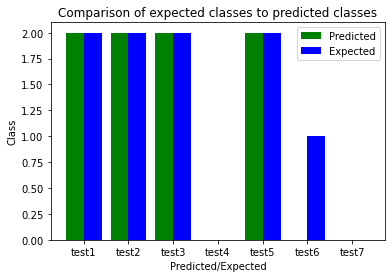

In [16]:
X = ['test1', 'test2', 'test3', 'test4', 'test5', 'test6', 'test7']
Ypredict = y_pred[110:117] 
Zexpect = y_test[110:117]

X_axis = np.arange(1, len(X)+1)

plt.bar(X_axis - 0.2, Ypredict, 0.4, label = 'Predicted', color = 'green')
plt.bar(X_axis + 0.2, Zexpect, 0.4, label = 'Expected', color = 'blue')

plt.xticks(X_axis, X)
plt.xlabel('Predicted/Expected')
plt.ylabel('Class')
plt.title('Comparison of expected classes to predicted classes')
plt.legend()
plt.show()

# Summarizing the prediction report using a confusion matrix

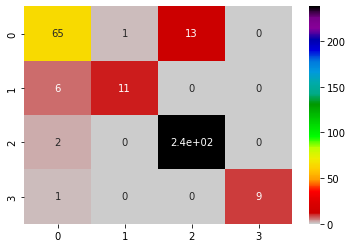

In [17]:
confusion = confusion_matrix(y_test, y_pred)


confusion_df = pd.DataFrame(confusion, index=range(4),
     columns=range(4))

axes = sns.heatmap(confusion_df, annot=True,
     cmap='nipy_spectral_r')

# Summarizing the report of the model based on each class

In [18]:
#summarizing our report on the model based on the class
print(classification_report(y_test, y_pred,
         target_names=names))

              precision    recall  f1-score   support

       unacc       0.88      0.82      0.85        79
         acc       0.92      0.65      0.76        17
        good       0.95      0.99      0.97       240
       vgood       1.00      0.90      0.95        10

    accuracy                           0.93       346
   macro avg       0.94      0.84      0.88       346
weighted avg       0.93      0.93      0.93       346



In [38]:
#Checking for the accuracy of our prediction 

accuracy = knn_model.score(X_test,y_test)

print(f'{accuracy: .2%}')

 93.35%
